In [1]:
import persistence_statistics as ps
import pandas as pd
import numpy as np
import pickle as pickle
import gudhi as gd
import seaborn as sbs
from scipy.spatial import distance_matrix
from pylab import *

## Confidence regions for persistence diagrams for point cloud data in R^d

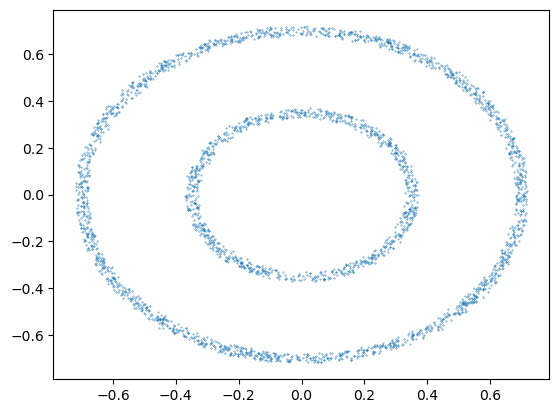

In [2]:
U1 = np.random.uniform(0,2*pi, size = 1000)
V1 = np.array([[0.35*cos(u)+0.02*np.random.uniform(-1,1), 0.35*sin(u) + 0.02*np.random.uniform(-1,1)] for u in U1])
U2 = np.random.uniform(0,2*pi, size = 2000)
V2 = np.array([[0.7*cos(u)+0.02*np.random.uniform(-1,1), 0.7*sin(u) + 0.02*np.random.uniform(-1,1)] for u in U2])
W = np.concatenate((V1,V2), axis=0)
plt.scatter(W[:,0], W[:,1],s=0.1)

In [3]:
hatc = ps.hausd_interval(data=W,level = 0.90, m = 1)

In [4]:
Alpha_complex_W = gd.AlphaComplex(points = W)
Alpha_simplex_tree_W = Alpha_complex_W.create_simplex_tree()

In [5]:
Alpha_simplex_tree_W_list = Alpha_simplex_tree_W.get_filtration()

In [6]:
for splx in Alpha_simplex_tree_W_list:
    Alpha_simplex_tree_W.assign_filtration(splx[0],filtration= np.sqrt(splx[1]))

In [7]:
pers_alpha_W= Alpha_simplex_tree_W.persistence()

usetex mode requires ghostscript.


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

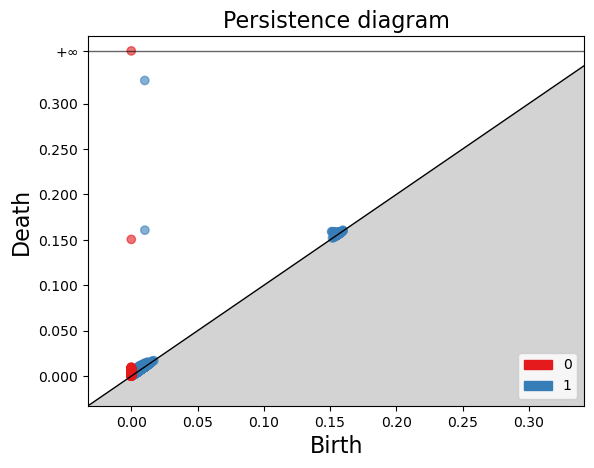

In [8]:
gd.plot_persistence_diagram(pers_alpha_W)

In [9]:
gd.plot_persistence_diagram(pers_alpha_W, band=2 * hatc);

In [ ]:
trefoil_dist = pickle.load( open( "./datasets/trefoil_dist", "rb" ) )

In [ ]:
hatc = ps.hausd_interval(trefoil_dist,pairwise_dist=True,level = 0.90, m = 900)
print(hatc)

In [ ]:
skeleton_trefoil = gd.RipsComplex(distance_matrix = trefoil_dist,max_edge_length=2) 
Rips_simplex_tree_trefoil = skeleton_trefoil.create_simplex_tree(max_dimension=2)

In [ ]:
BarCodes_trefoil = Rips_simplex_tree_trefoil.persistence()

In [ ]:
gd.plot_persistence_diagram(BarCodes_trefoil,band = 4*hatc)